# 5. Improving a Model with Hyperparameter Tuning

**Three way so adjust hyperparameters:**

1. [By manually adjusting](#manual)
2. [Randomly with RandomSearchCV](#randomsearch)
3. [Exhaustively with GridSearchCV](gridsearch)

First Predictions = baseline predictions, First Model = baseline Model

From a data perspective:
* Could we collect more data? (generally, the more data, the better model is)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters Vs Parameters
* Parameters = model find these pattern in the data (m and b in y=mx+b)
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

# Example on Classfication Model


In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
model = RandomForestClassifier()

In [3]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_predictions_classification(y_true, y_pred):
    """
    performs evaluation comparion on y_true and y_pred
    """
    accuracy = accuracy_score(y_true, y_pred) 
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    
    return metric_dict

In [5]:
import numpy as np
import pandas as pd

heart_disease = pd.read_csv('../00.datasets/heart-diseases.csv')

In [6]:
# shuffle data
heart_disease = heart_disease.sample(frac=1)

In [7]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

#### # baseline model

In [8]:

np.random.seed(42)

model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)

# Evaluate the classifier on Validation set
baseline_metrics = evaluate_predictions_classification(y_val, y_pred_val)

Accuracy: 84.44%
Precision: 0.77
Recall: 0.89
F1: 0.83


# <a name='manual'>1) Hyper Parameter Tuning by manually </a>

We are going to adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [9]:
np.random.seed(42)

# changing n_estimators
model2 = RandomForestClassifier(n_estimators= 100)
model2.fit(X_train, y_train)

y_pred_val = model2.predict(X_val)

# Evaluate the classifier on Validation set
baseline_metrics = evaluate_predictions_classification(y_val, y_pred_val)

Accuracy: 84.44%
Precision: 0.77
Recall: 0.89
F1: 0.83


In [10]:
np.random.seed(42)

# changing n_estimators and max_depth
model3 = RandomForestClassifier(n_estimators= 100, max_depth=20)
model3.fit(X_train, y_train)

y_pred_val = model3.predict(X_val)

# Evaluate the classifier on Validation set
baseline_metrics = evaluate_predictions_classification(y_val, y_pred_val)

Accuracy: 84.44%
Precision: 0.77
Recall: 0.89
F1: 0.83


-----

# <a name='randomsearch'>2) Hyperparameter Tuning with RandomizedSearchCV</a>

**RandomizedSearchCV the model selects the combinations randomly.**

**plus, it has parameter called `n_iter`: number of models to try**

We are going to adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
grid_params = {
    'n_estimators': [10, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6]
}

In [13]:
# create model
model = RandomForestClassifier(n_jobs=1) # n_jobs means how much of your PC resources you want to dedicated to ML

# set up Randomized Search CV
rs_model = RandomizedSearchCV(estimator = model, 
                                                      param_distributions = grid_params,
                                                      n_iter = 10, # number of models to try
                                                      cv=5, 
                                                      verbose = 2)

# model training
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_sample

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=10, min_samples_split=6, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [14]:
# get the best params to see which combinations give the best Result
rs_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [26]:
# make predictions
rs_y_pred = rs_model.predict(X_val)

# evaluate the performance
rs_metrics = evaluate_predictions_classification(y_val, rs_y_pred)

Accuracy: 82.22%
Precision: 0.72
Recall: 0.95
F1: 0.82


Base Line:

Accuracy: 84.44%
Precision: 0.77
Recall: 0.89
F1: 0.83

Compared to Base Line, our model using RandomizedSearchCV got a bit lower in Accuracy and Precision. But Recall and F1 got improved.

---------

# <a name='gridsearch'>3) Hyperparameter Tuning with GridSearchCV</a>

**In Grid search we define the combinations and do training of the model.**

We are going to adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_params = {
    'n_estimators': [10, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [6]
}

In [18]:
# create model
model = RandomForestClassifier(n_jobs=1)

# set up Grid Search CV
gs_model = GridSearchCV(estimator = model, 
                                          param_grid = grid_params,
                                          cv=5, 
                                          verbose = 2)

# model training
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_sam

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.8s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200, 500, 1000]},
             verbose=2)

In [23]:
# get the best params
gs_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [25]:
gs_y_pred = gs_model.predict(X_val)

# evaluate the performance
gs_metrics = evaluate_predictions_classification(y_val, gs_y_pred)

gs_metrics

Accuracy: 82.22%
Precision: 0.72
Recall: 0.95
F1: 0.82


{'accuracy': 0.82, 'precision': 0.72, 'recall': 0.95, 'f1': 0.82}

**Base Line:**
Accuracy: 84.44% Precision: 0.77 Recall: 0.89 F1: 0.83

**RandomizedSearchCV:**
{'accuracy': 0.82, 'precision': 0.72, 'recall': 0.95, 'f1': 0.82}

-----------

# Comparison of Our models metrics

In [27]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics, 
                                                       'randomized_search_cv': rs_metrics,
                                                       'grid_search_cv': gs_metrics})

In [32]:
compare_metrics.head()

,baseline,randomized_search_cv,grid_search_cv
accuracy,0.84,0.82,0.82
precision,0.77,0.72,0.72
recall,0.89,0.95,0.95
f1,0.83,0.82,0.82


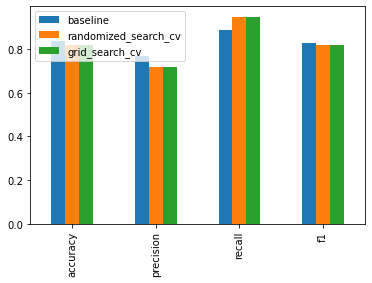

In [31]:
compare_metrics.plot.bar();

--------

Based on the comparison, our RandomizedSearchCV model and GridSearchCV produce the same results with different hyperparameters.

### Final Evaluation with test data

In [33]:
# GridSearchCV
y_pred_test = gs_model.predict(X_test)

evaluate_predictions_classification(y_test, y_pred_test)

Accuracy: 78.26%
Precision: 0.71
Recall: 0.96
F1: 0.81


{'accuracy': 0.78, 'precision': 0.71, 'recall': 0.96, 'f1': 0.81}

In [34]:
# RandomizedSearchCV
y_pred_test = rs_model.predict(X_test)

evaluate_predictions_classification(y_test, y_pred_test)

Accuracy: 80.43%
Precision: 0.73
Recall: 0.96
F1: 0.83


{'accuracy': 0.8, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

Based on the final evaluation, RandomizedSearchCV produce the better result.